In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 33.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
spam=pd.read_csv("spaam.csv")

In [5]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2897,ham,If you r @ home then come down within 5 min,NaN,NaN,NaN
3787,spam,Want to funk up ur fone with a weekly new tone...,NaN,NaN,NaN
1145,spam,"Thank you, winner notified by sms. Good Luck! ...",NaN,NaN,NaN
3930,ham,Nooooooo I'm gonna be bored to death all day. ...,NaN,NaN,NaN
943,ham,And also I've sorta blown him off a couple tim...,NaN,NaN,NaN


 1. DATA CLEANING
 
 2. EDA
 
 3. TEXT PREPROCESSING
 
4. MODEL BUILDING

 5. EVALUATION
 
 6. IMPROVEMENT
 
 7. WEBSITE
 
 8. DEPLOY

1. DATA CLEANING

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last three column
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
#  change column name 
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam.sample()

,target,text
1170,ham,"Yeah, we can probably swing by once my roommat..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
spam['target']=encoder.fit_transform(spam['target'])

In [12]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
spam.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
spam=spam.drop_duplicates(keep='first')

In [15]:
spam.shape

(5169, 2)

2.EDA

In [16]:
spam['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7ff83758f190>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

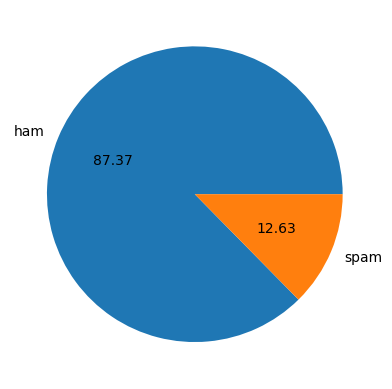

In [18]:
plt.pie(spam['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [19]:
# data is imbalanced

In [20]:
! pip install nltk
import nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 46.2 MB/s eta 0:00:00


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
spam['num_characters']=spam['text'].apply(len)

In [23]:
spam.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
spam['num_words']=spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
spam['num_sentences']=spam['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [26]:
spam.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
spam[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
spam[spam['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
spam[spam['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<AxesSubplot: xlabel='num_words', ylabel='Count'>

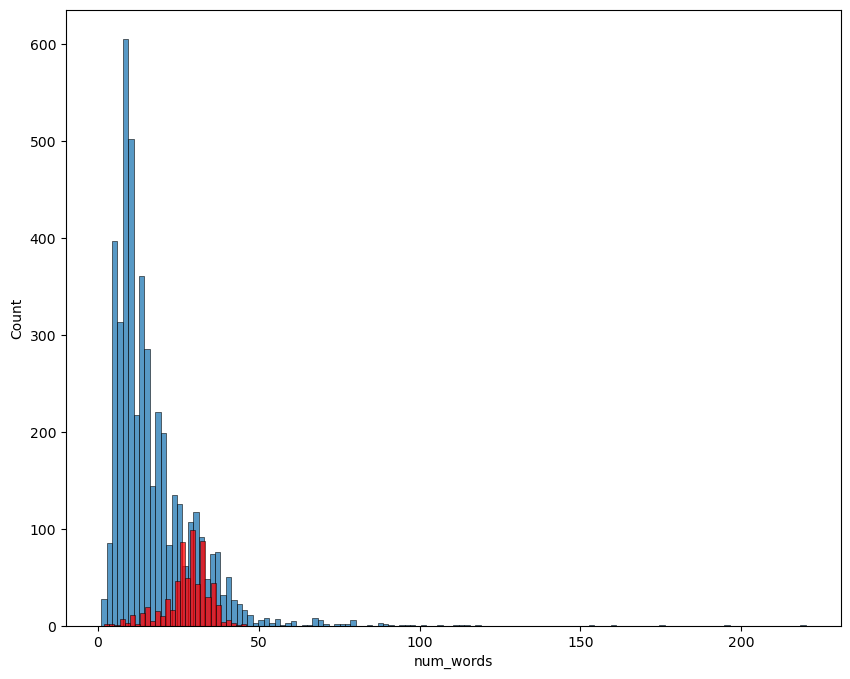

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(spam[spam['target']==0]['num_words'])
sns.histplot(spam[spam['target']==1]['num_words'],color='r')

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

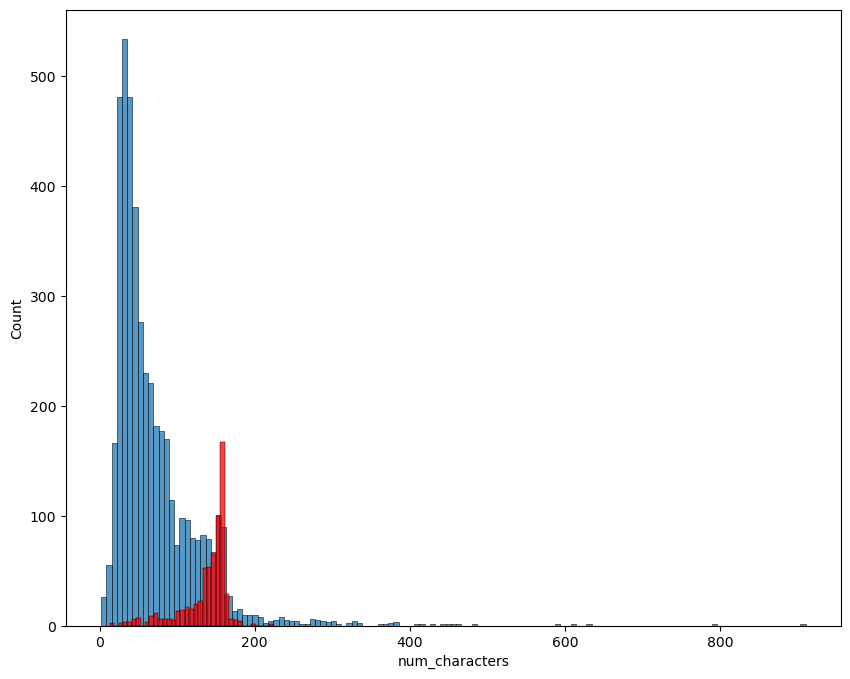

In [32]:
plt.figure(figsize=(10,8))
sns.histplot(spam[spam['target']==0]['num_characters'])
sns.histplot(spam[spam['target']==1]['num_characters'],color='r')

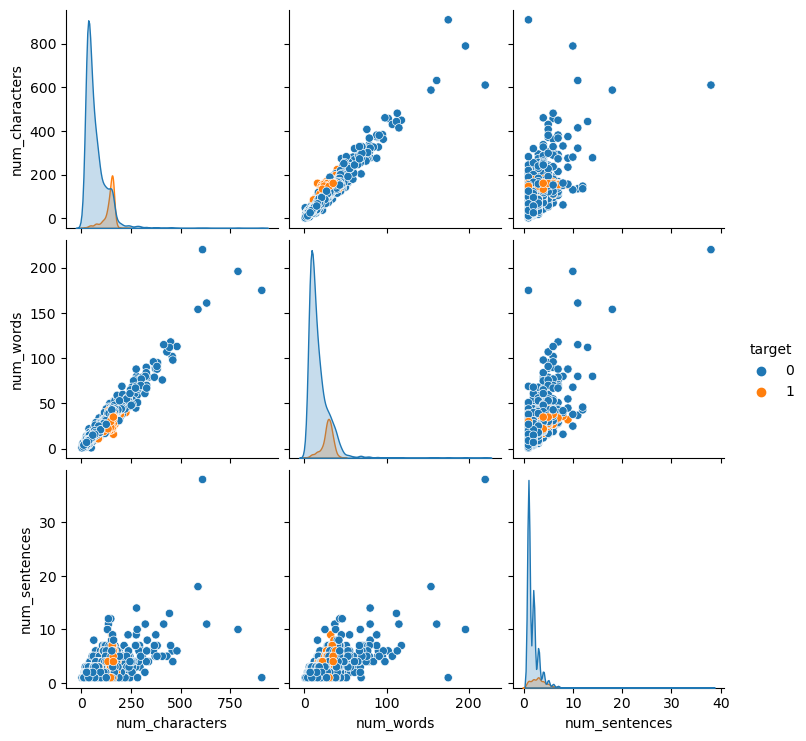

In [33]:
sns.pairplot(spam,hue='target')

/tmp/ipykernel_77/1311123908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam.corr(),annot=True)


<AxesSubplot: >

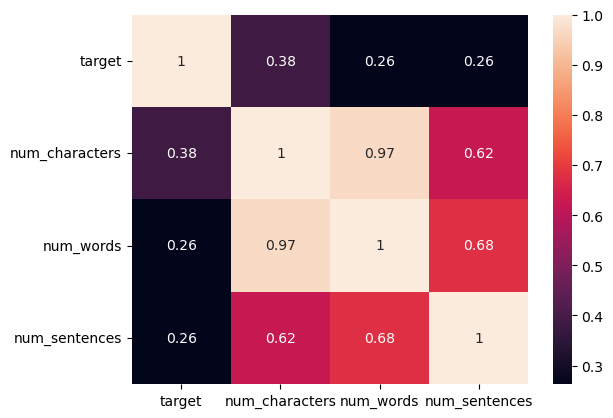

In [34]:
sns.heatmap(spam.corr(),annot=True)

3.Data Preprocessing

a)Lower case

b)Tokenization

c)Removing special characters

d)Removing stop words and punctuation

e)Stemming



In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [36]:
# download the stopwords resource
! python -m nltk.downloader stopwords

# import the stopwords module
from nltk.corpus import stopwords

# use the stopwords module
stopwords.words('english')


/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear() 
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)     
            

In [39]:
transform_text("I loved the YT lectures on Machine Learning. How about you?  .")

'love yt lectur machin learn'

In [49]:
spam['transform_text']=spam['text'].apply(transform_text)

In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [52]:
spam_wc=wc.generate(spam[spam['target']==1]['transform_text'].str.cat(sep=" "))

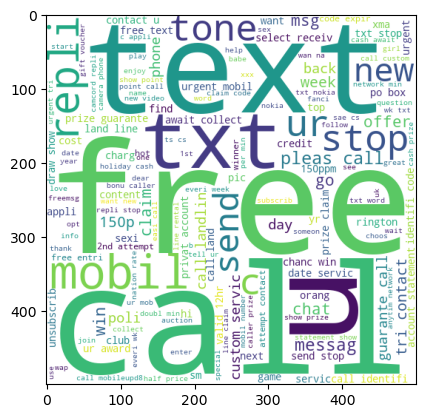

In [53]:
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(spam[spam['target']==0]['transform_text'].str.cat(sep=" "))

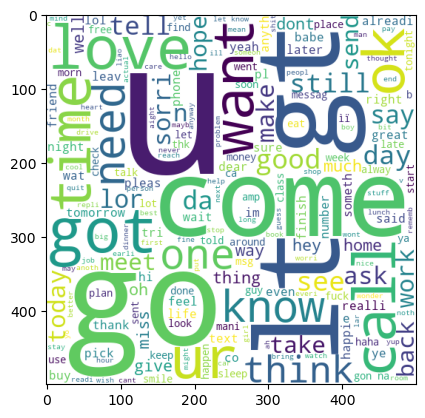

In [54]:
plt.imshow(ham_wc)

In [58]:
spam_corpus=[]
for msg in spam[spam['target']==1]['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [59]:
len(spam_corpus)

9939

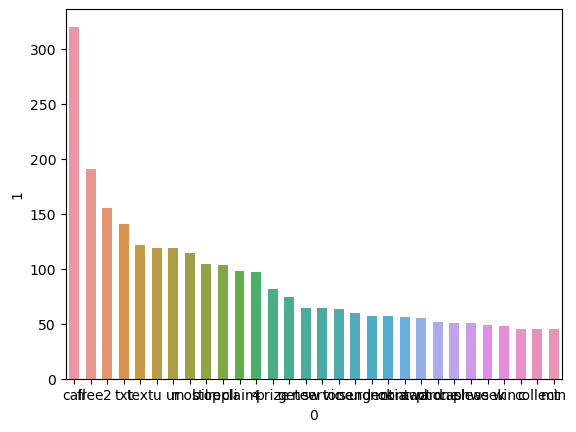

In [68]:
from collections import Counter
Counter=pd.DataFrame(Counter(spam_corpus).most_common(30))
Counter
sns.barplot(x=0,y=1,data=Counter,width=0.6)
# plt.xticks(rotaion='vertical')
plt.show()

In [70]:
ham_corpus=[]
for msg in spam[spam['target']==0]['transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

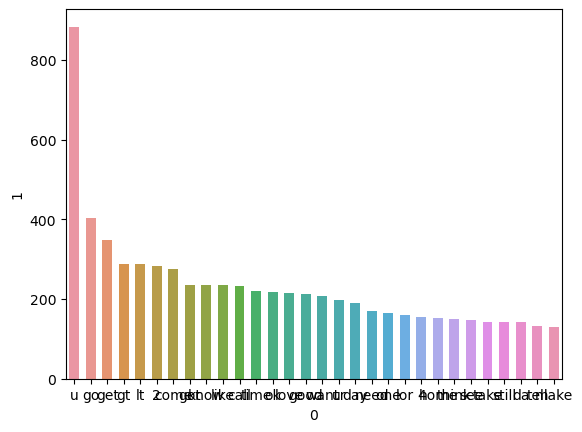

In [73]:
from collections import Counter
Counter=pd.DataFrame(Counter(ham_corpus).most_common(30))
Counter
sns.barplot(x=0,y=1,data=Counter,width=0.6)
# plt.xticks(rotaion='vertical')
plt.show()

4 Model building

In [76]:
spam.head(3)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [78]:
x=tfidf.fit_transform(spam['transform_text']).toarray()

In [79]:
y=spam['target'].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [103]:
mnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [104]:
bnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [99]:
pip install Xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 9.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC
from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [110]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
from sklearn.metrics import accuracy_score,precision_score




In [120]:
clfs= {
    "SVC":svc,
    "KN":knc,
    "MNB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}

In [134]:

from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # Print to check if accuracy_score and precision_score are callable
    print(f"accuracy_score: {accuracy_score}, precision_score: {precision_score}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

accuracy_scores=[]
precision_scores=[]

clfs= {
    "SVC":svc,
    "KN":knc,
    "MNB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}


for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


accuracy_score: <function accuracy_score at 0x7ff8369832e0>, precision_score: <function precision_score at 0x7ff836983a30>
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
accuracy_score: <function accuracy_score at 0x7ff8369832e0>, precision_score: <function precision_score at 0x7ff836983a30>
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
accuracy_score: <function accuracy_score at 0x7ff8369832e0>, precision_score: <function precision_score at 0x7ff836983a30>
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
accuracy_score: <function accuracy_score at 0x7ff8369832e0>, precision_score: <function precision_score at 0x7ff836983a30>
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
accuracy_score: <function accuracy_score at 0x7ff8369832e0>, precision_score: <function precision_score at 0x7ff836983a30>
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
accuracy_score: <function accuracy_score at 0x7ff8369832e0

In [137]:
if len(clfs.keys()) == len(accuracy_scores) == len(precision_scores):
    performance_df = pd.DataFrame({
        "Algorithm": list(clfs.keys()),
        "Accuracy": accuracy_scores,
        "Precision": precision_scores
    }).sort_values("Precision", ascending=False)
    print(performance_df)
else:
    print("Mismatch in lengths of the lists.")

   Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2        MNB  0.970986   1.000000
5         RF  0.975822   0.982906
0        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
4         LR  0.958414   0.970297
6   AdaBoost  0.960348   0.929204
10       xgb  0.967118   0.926230
9       GBDT  0.946809   0.919192
7        BgC  0.958414   0.868217
3         DT  0.932302   0.833333


In [138]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [139]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


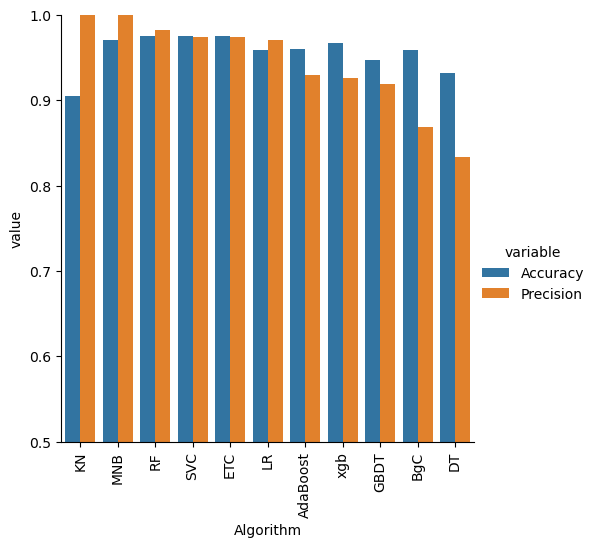

In [140]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df1,kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [141]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"Precision_max_ft_3000":precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)

In [142]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_scaling":accuracy_scores,"Precision_scaling":precision_scores}).sort_values("Precision_scaling",ascending=False)

In [146]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [147]:
new_df_scaled=new_df.merge(temp_df,on="Algorithm")

In [148]:
# VOTING CLASSIFIERS
svc=SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [149]:
Voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [150]:
y_pred  = Voting.fit(x_train,y_train).predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",confusion_matrix(y_test,y_pred))

Accuracy 0.9816247582205029
Precision [[895   1]
 [ 18 120]]


applying stacking

In [151]:
jo9estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [152]:
from sklearn.ensemble import StackingClassifier

In [153]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",confusion_matrix(y_test,y_pred))

Accuracy 0.9671179883945842
Precision [[887   9]
 [ 25 113]]


In [154]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))